In [60]:
import random
from collections import Counter
import sys
## -*- coding: utf-8 -*-
# -*- coding: utf-8 -*- 
#coding=gbk
import os
os.system('export LC_ALL="en_US.UTF-8"')
import jieba
import matplotlib

In [3]:
hello_rules = '''
say_hello = names hello tail 
names = name names | name
name = Jhon | Mike | 老梁 | 老刘 
hello = 你好 | 您来啦 | 快请进
tail = 呀 | ！
'''

In [4]:
'add = number + number'

'add = number + number'

In [5]:
def get_generation_by_gram(grammar_str, target, stmt_split='=', or_split='|'):

    rules = dict() # key is the @statement, value is @expression
    for line in grammar_str.split('\n'):
        if not line: continue
        # skip the empty line
      #  print(line)
        stmt, expr = line.split(stmt_split)
    
        rules[stmt.strip()] = expr.split(or_split)
    
    generated = generate(rules, target=target)
    
    return generated

In [6]:
def generate(grammar_rule, target):
    if target in grammar_rule: # names 
        candidates = grammar_rule[target]  # ['name names', 'name']
        candidate = random.choice(candidates) #'name names', 'name'
        return ''.join(generate(grammar_rule, target=c.strip()) for c in candidate.split())
    else:
        return target

In [7]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的"""

In [8]:
get_generation_by_gram(simple_grammar, target='sentence', stmt_split='=>')

'一个蓝色的好看的蓝色的小小的蓝色的蓝色的小猫听着一个蓝色的小猫'

In [9]:
simpel_programming = '''
if_stmt => if ( cond ) { stmt }
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  char var | char
char => a | b |  c | d | 0 | 1 | 2 | 3
'''

In [11]:
for i in range(20):
    print(get_generation_by_gram(simpel_programming, target='if_stmt', stmt_split='=>'))
    

if(22232==01){if(3<10){if(2<b){if(cc<1){if(1b<1){b=1}}}}}
if(aa0){if(ab<=d){if(11<=a){ad0c12a=2ca}}}
if(c3<a){if(0<2){if(a2==b32){if(2>=aa2){if(0c==222bd0){2=b}}}}}
if(c0){2=a}
if(1==2d){if(1<2){1=2}}
if(bb<c){if(222d33){1=a}}
if(d>=02){d=ad}
if(ac>=d){c22=3}
if(3>=3){if(3d<=d){1=b22a0}}
if(13d){if(1b0c==b){0=0}}
if(22a<=b){12c=20}
if(b1==c2){if(0==b){3=0b3}}
if(b133){c=a}
if(b<=3){if(cc==dd){3=b1}}
if(00023){if(3d==bc){if(bd<d1b1b){a=d3}}}
if(c<3){if(1==ab){22a1ba=0}}
if(a<d){b=ca}
if(b1d1d32){0dd0bc2=2}
if(a>=da){if(ad3){c2=d}}
if(3ad>=1c0a){if(aca==313){if(cd){aa=220a}}}


In [13]:
def get_generation_by_gram2(grammar_str, target, stmt_split='=', or_split='|'):

    rules = dict() # key is the @statement, value is @expression
    for line in grammar_str.split('\n'):
        if not line: continue
        # skip the empty line
      #  print(line)
        stmt, expr = line.split(stmt_split)
    
        rules[stmt.strip()] = expr.split(or_split)
    return rules
    #generated = generate(rules, target=target)
    
    #return generated

In [21]:
rules = get_generation_by_gram2(hello_rules, target='sentence', stmt_split='=')
rules
# rules['name']
# rules['names']
# rules['name']
# generate(rules, target='say_hello')


{'say_hello': [' names hello tail '],
 'names': [' name names ', ' name'],
 'name': [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘 '],
 'hello': [' 你好 ', ' 您来啦 ', ' 快请进'],
 'tail': [' 呀 ', ' ！']}

## Language Model:
$$ Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i, w_{i+1})}{count(w_i)} $$

In [44]:
corpus = '/Users/wangqin/Downloads/jupyters_and_slides/jupyters_and_slides-master/2019-autumn/article_9k.txt'

In [46]:
FILE = open(corpus,encoding="utf-8").read()

In [47]:
def generate_by_pro(text_corpus, length=20):
    return ''.join(random.sample(text_corpus, length))

len(FILE)

33425826

In [48]:
max_length = 1000000 
sub_file = FILE[:max_length]

In [49]:
def cut(string):
    return list(jieba.cut(string))

In [56]:
TOKENS = cut(sub_file)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/cm/kbmcn4j97tb1xc18l7kb__cr0000gn/T/jieba.cache
Loading model cost 1.041 seconds.
Prefix dict has been built succesfully.


In [61]:
%matplotlib inline

In [62]:
words_count = Counter(TOKENS)

In [63]:
words_count.most_common(20)

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960),
 ('年', 1959),
 ('对', 1795),
 ('都', 1720),
 ('中', 1699),
 ('为', 1686),
 ('日', 1674),
 ('等', 1655),
 ('与', 1601),
 ('中国', 1597),
 ('上', 1583)]

/Users/wangqin/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


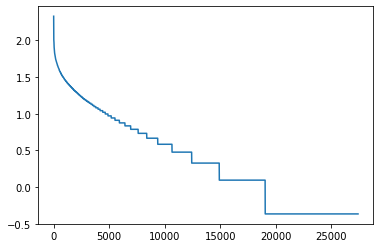

In [65]:
words_with_fre = [f for w, f in words_count.most_common()]
import matplotlib.pyplot as plt
words_with_fre[:10]
import numpy as np
plt.plot(np.log(np.log(words_with_fre)))

In [66]:
list(jieba.cut('一加手机5要做市面最轻薄'))
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [67]:
_2_gram_word_counts = Counter(_2_gram_words)
words_count.most_common()[-1][-1]

1

In [68]:
def get_1_gram_count(word):
    if word in words_count: return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [69]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts: return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]

In [70]:
def get_gram_count(word, wc):
    if word in wc: return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [71]:
def two_gram_model(sentence):
    # 2-gram langauge model
    tokens = cut(sentence)
    
    probability = 1
    
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word, words_count)
        pro =  _two_gram_c / _one_gram_c
        
        probability *= pro
    
    return probability

In [72]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')

3.0550026391456175e-26

In [73]:
two_gram_model('我请你吃火锅')

3.0458089668615984e-06

In [74]:
two_gram_model('这个人来自清华大学')

2.102784086130036e-06

In [75]:
two_gram_model('这个花特别好看')

1.7475796022508822e-05

In [ ]:
0. Can you come up out 3 sceneraies which use AI methods?
Ans: Recommendding system, self driving, stock deal. 

1. How do we use Github; Why do we use Jupyter and Pycharm;
Ans: We use Github to store, manage, and share our code. The reason why we use Jupyter is that we can use it for better presentation.
    Also, we can use Pycharm for better project management.

2. What's the Probability Model?
Ans:The Probability Model is a model that can get the probability of different words combination or sentence, and the higher the probability is, the more likely correct and meaningful the sentence is.

3. Can you came up with some sceneraies at which we could use Probability Model?
Ans:

4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?
Ans:

5. What's the Language Model;
Ans:

6. Can you came up with some sceneraies at which we could use Language Model?
Ans:

7. What's the 1-gram language model;
Ans:

8. What's the disadvantages and advantages of 1-gram language model;
Ans:

9. What't the 2-gram models;
Ans: